<a href="https://colab.research.google.com/github/thegr1ffyn/Artificial-Intelligence/blob/main/Final%20Exam/Final_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hamza Haroon
## 211064 BSCYS VI-A
## AI Lab Final Exam

a) Perform all the necessary EDA on provided dataset

# Question 1

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Q1.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info()
data.head()

# Summary statistics for numerical columns
data.describe()

# Count of unique values in each column
data.nunique()

# Count of missing values in each column
data.isnull().sum()

# Distribution of the target variable 'Flag'
data['Flag'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Time Stamp  4004 non-null   int64 
 1   CAN ID      4004 non-null   object
 2   DLC         4004 non-null   int64 
 3   D0          4004 non-null   object
 4   D1          4004 non-null   object
 5   D2          4004 non-null   object
 6   D3          3975 non-null   object
 7   D4          3975 non-null   object
 8   D5          3975 non-null   object
 9   D6          3922 non-null   object
 10  D7          3922 non-null   object
 11  Flag        3922 non-null   object
dtypes: int64(2), object(10)
memory usage: 375.5+ KB


Flag
Normal                 2888
Spoofing drive gear     321
DOS                     279
Spoofing RPM guaze      267
Fuzzy                   167
Name: count, dtype: int64

b) Normalize the provided data set

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to normalize
numerical_cols = ['Time Stamp', 'DLC']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


c) Balance the dataset using smote

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Separate features and target variable
X = data.drop(columns=['Flag'])
y = data['Flag']

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = X.select_dtypes(exclude=['float64', 'int64']).columns

# Instantiate the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('numeric', 'passthrough', numeric_cols),
        ('non_numeric', OneHotEncoder(handle_unknown='ignore'), non_numeric_cols)
    ],
    remainder='passthrough'
)

# Transform the data
X = column_transformer.fit_transform(X)

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

d) Split dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


e) Apply deep neural network and Random Forest on balanced dataset

In [ ]:
import tensorflow as tf
import numpy as np
from scipy.sparse import csr_matrix

# Convert X_train, X_val, and X_test to scipy.sparse.csr_matrix
X_train_csr = csr_matrix(X_train)
X_val_csr = csr_matrix(X_val)
X_test_csr = csr_matrix(X_test)

# Convert scipy.sparse.csr_matrix to TensorFlow SparseTensors
X_train_sparse = tf.SparseTensor(indices=np.array([X_train_csr.nonzero()[0], X_train_csr.nonzero()[1]]).T,
                                 values=X_train_csr.data,
                                 dense_shape=X_train_csr.shape)

X_val_sparse = tf.SparseTensor(indices=np.array([X_val_csr.nonzero()[0], X_val_csr.nonzero()[1]]).T,
                                values=X_val_csr.data,
                                dense_shape=X_val_csr.shape)

X_test_sparse = tf.SparseTensor(indices=np.array([X_test_csr.nonzero()[0], X_test_csr.nonzero()[1]]).T,
                                 values=X_test_csr.data,
                                 dense_shape=X_test_csr.shape)

# Reorder the indices of the sparse tensors
X_train_reordered = tf.sparse.reorder(X_train_sparse)
X_val_reordered = tf.sparse.reorder(X_val_sparse)
X_test_reordered = tf.sparse.reorder(X_test_sparse)

# Deep Neural Network
model = Sequential()
model.add(Dense(64, input_dim=X_train_reordered.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_reordered, y_train, epochs=10, batch_size=32, validation_data=(X_val_reordered, y_val))
y_pred_dnn = model.predict(X_test_reordered)
y_pred_dnn_classes = y_pred_dnn.argmax(axis=-1)

Epoch 1/10
278/278 [==============================] - 19s 56ms/step - loss: nan - accuracy: 0.1648 - val_loss: nan - val_accuracy: 0.1713
Epoch 2/10
278/278 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.1640 - val_loss: nan - val_accuracy: 0.1713
Epoch 3/10
278/278 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.1640 - val_loss: nan - val_accuracy: 0.1713
Epoch 4/10
278/278 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.1640 - val_loss: nan - val_accuracy: 0.1713
Epoch 5/10
278/278 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.1640 - val_loss: nan - val_accuracy: 0.1713
Epoch 6/10
278/278 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.1640 - val_loss: nan - val_accuracy: 0.1713
Epoch 7/10
278/278 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1640 - val_loss: nan - val_accuracy: 0.1713
Epoch 8/10
278/278 [========================

f) Calculate the accuracy, precision and F1 score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Random Forest metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# DNN metrics
accuracy_dnn = accuracy_score(y_test, y_pred_dnn_classes)
precision_dnn = precision_score(y_test, y_pred_dnn_classes, average='weighted')
f1_dnn = f1_score(y_test, y_pred_dnn_classes, average='weighted')

accuracy_rf, precision_rf, f1_rf, accuracy_dnn, precision_dnn, f1_dnn


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1.0, 1.0, 1.0, 0.173398730525101, 0.030067119747716586, 0.05124791593094944)

g) Draw confusion matrix.

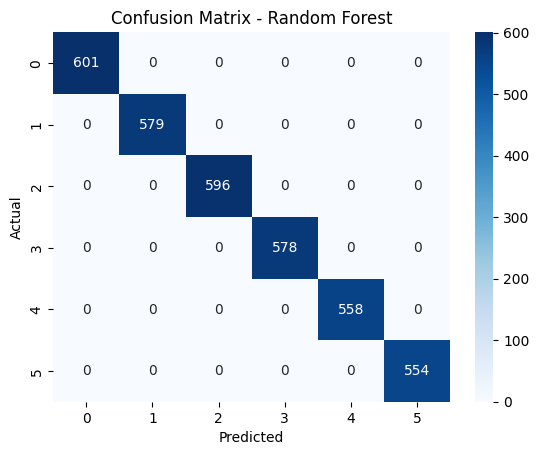

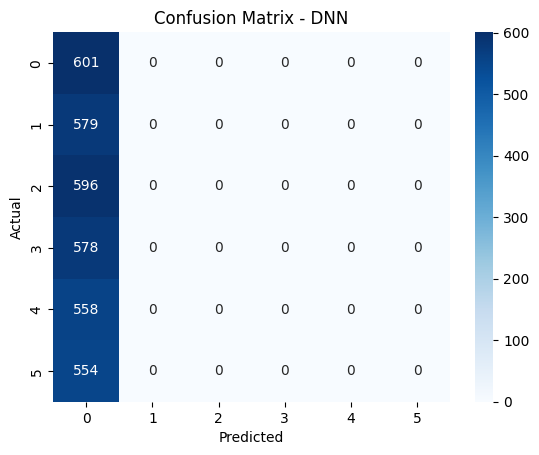

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for DNN
cm_dnn = confusion_matrix(y_test, y_pred_dnn_classes)
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - DNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Question 2

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import numpy as np

file_path = '/content/Malware dataset.csv'
data = pd.read_csv(file_path)

a Print the summary of data frame

In [6]:
print("Summary of DataFrame:")
print(data.describe())

Summary of DataFrame:
       req/headers/content-length
count                      1000.0
mean                         70.0
std                           0.0
min                          70.0
25%                          70.0
50%                          70.0
75%                          70.0
max                          70.0


b - Show the type of each column

In [29]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Unnamed: 0                                                            int64
Number                                                                int64
Name_of_Covered_Entity                                               object
State                                                                object
Business_Associate_Involved                                          object
Individuals_Affected                                                  int64
Date_of_Breach                                                       object
Location_of_Breached_Information                                     object
Date_Posted_or_Updated                                               object
breach_start                                                         object
breach_end                                                           object
year                                                                  int64
Breach_Hacking/IT Incident                                  

c - Print the minimum and maximum value of each column

In [8]:
print("\nMinimum and Maximum values of each column:")
for column in data.columns:
    print(f"{column}: Min={data[column].min()}, Max={data[column].max()}")


Minimum and Maximum values of each column:
req/baseUrl: Min=/crm/note, Max=/crm/note
req/body/note/title: Min=Aaron Long, Max=Zachary Castillo
req/body/note/desc: Min=<imgsrc=x onerror="javascript:alert(1)">, Max=text1<video src=1 href=1 onerror="javascript:alert(1)"></video>hello
req/fresh: Min=False, Max=False
req/headers/host: Min=example.com, Max=example.com
req/headers/user-agent: Min=insomnia/2020.4.2, Max=insomnia/2020.4.2
req/headers/content-type: Min=application/json, Max=application/json
req/headers/org_id: Min=5f572820f65af8ac955b2e83, Max=5f572820f65af8ac955b2e83
req/headers/user_session_id: Min=5fb27d3750b11901a35649fe, Max=5fb27d3750b11901a35649fe
req/headers/accept: Min=*/*, Max=*/*
req/headers/content-length: Min=70, Max=70
req/headers/user/name: Min=sam, Max=sam
req/headers/user/role: Min=sales1, Max=sales1
req/hostname: Min=example.com, Max=example.com
req/ip: Min=::ffff:117.99.96.244, Max=::ffff:117.99.96.244
req/originalUrl: Min=/crm/note, Max=/crm/note
req/path: 

d - Find the count of missing values in each column

In [9]:
print("\nCount of missing values in each column:")
print(data.isnull().sum())


Count of missing values in each column:
req/baseUrl                    0
req/body/note/title            0
req/body/note/desc             0
req/fresh                      0
req/headers/host               0
req/headers/user-agent         0
req/headers/content-type       0
req/headers/org_id             0
req/headers/user_session_id    0
req/headers/accept             0
req/headers/content-length     0
req/headers/user/name          0
req/headers/user/role          0
req/hostname                   0
req/ip                         0
req/originalUrl                0
req/path                       0
req/protocol                   0
req/secure                     0
req/stale                      0
req/subdomains/0               0
req/xhr                        0
isSafe                         0
dtype: int64


e - Fill the missing values with appropriate method

In [10]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

f - Print the number of unique values in each column

In [11]:
print("\nNumber of unique values in each column:")
print(data.nunique())
# Encoding categorical columns
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

target_column = data.columns[-1]


Number of unique values in each column:
req/baseUrl                      1
req/body/note/title            994
req/body/note/desc             750
req/fresh                        1
req/headers/host                 1
req/headers/user-agent           1
req/headers/content-type         1
req/headers/org_id               1
req/headers/user_session_id      1
req/headers/accept               1
req/headers/content-length       1
req/headers/user/name            1
req/headers/user/role            1
req/hostname                     1
req/ip                           1
req/originalUrl                  1
req/path                         1
req/protocol                     1
req/secure                       1
req/stale                        1
req/subdomains/0                 1
req/xhr                          1
isSafe                           2
dtype: int64


g - Separate the 30% of data for testing purpose

In [12]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)


h - Apply CNN on provided dataset

In [13]:
# Preparing data for CNN
X_train = train_data.drop(target_column, axis=1).values
y_train = train_data[target_column].values
X_test = test_data.drop(target_column, axis=1).values
y_test = test_data[target_column].values

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# h. Apply CNN on provided dataset
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 2s 17ms/step - loss: 0.6853 - accuracy: 0.6071 - val_loss: 0.6763 - val_accuracy: 0.6786
Epoch 2/10
18/18 [==============================] - 0s 7ms/step - loss: 0.6665 - accuracy: 0.6500 - val_loss: 0.6581 - val_accuracy: 0.6286
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.6439 - accuracy: 0.6536 - val_loss: 0.6418 - val_accuracy: 0.7000
Epoch 4/10
18/18 [==============================] - 0s 7ms/step - loss: 0.6291 - accuracy: 0.6804 - val_loss: 0.6194 - val_accuracy: 0.6714
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 0.6223 - accuracy: 0.6857 - val_loss: 0.6105 - val_accuracy: 0.6571
Epoch 6/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6096 - accuracy: 0.6804 - val_loss: 0.5912 - val_accuracy: 0.6857
Epoch 7/10
18/18 [==============================] - 0s 9ms/step - loss: 0.5977 - accuracy: 0.7000 - val_loss: 0.5825 - val_accuracy: 0.7286
Epoch 8/10
18/18 [

i - Evaluate the model and draw confusion matrix and classification report as well

10/10 [==============================] - 0s 2ms/step

Confusion Matrix:
[[ 83  44]
 [ 48 125]]


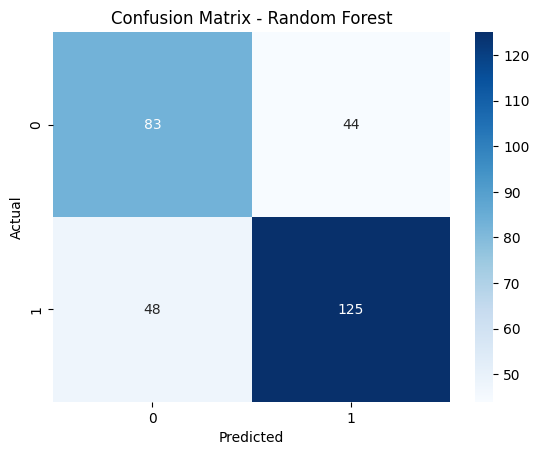


Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.65      0.64       127
        True       0.74      0.72      0.73       173

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



In [14]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


# Question 3

a - Import appropriate libraries to perform the tasks.

In [15]:
# a. Import appropriate libraries to perform the tasks.
import pandas as pd
from sklearn.model_selection import train_test_split

b - Read the above csv

In [16]:
# b. Read the above CSV
file_path = '/content/Cyber Security Breaches.csv'
data = pd.read_csv(file_path)

c - Visualize the provided data

In [17]:
# c. Visualize the provided data
print("First few rows of the data:")
print(data.head())

First few rows of the data:
   Unnamed: 0  Number                             Name_of_Covered_Entity  \
0           1       0                         Brooke Army Medical Center   
1           2       1          Mid America Kidney Stone Association, LLC   
2           3       2    Alaska Department of Health and Social Services   
3           4       3  Health Services for Children with Special Need...   
4           5       4                           L. Douglas Carlson, M.D.   

  State Business_Associate_Involved  Individuals_Affected Date_of_Breach  \
0    TX                         NaN                  1000     10/16/2009   
1    MO                         NaN                  1000      9/22/2009   
2    AK                         NaN                   501     10/12/2009   
3    DC                         NaN                  3800     10/09/2009   
4    CA                         NaN                  5257      9/27/2009   

  Type_of_Breach         Location_of_Breached_Information 

d - Randomize the data

In [18]:
# d. Randomize the data
data = data.sample(frac=1).reset_index(drop=True)

e - Print the count of null values in each column.

In [19]:
# e. Print the count of null values in each column.
print("\nNull values count before handling:")
print(data.isnull().sum())


Null values count before handling:
Unnamed: 0                            0
Number                                0
Name_of_Covered_Entity                0
State                                 0
Business_Associate_Involved         784
Individuals_Affected                  0
Date_of_Breach                        0
Type_of_Breach                        0
Location_of_Breached_Information      0
Date_Posted_or_Updated                0
Summary                             913
breach_start                          0
breach_end                          910
year                                  0
dtype: int64


f - Deal with the null values

In [20]:
# f. Deal with the null values
data['Business_Associate_Involved'].fillna('Unknown', inplace=True)
data['Summary'].fillna('Unknown', inplace=True)
data.dropna(subset=['Individuals_Affected'], inplace=True)

g - Print the summary of data frame.

In [21]:
# g. Print the summary of data frame.
print("\nData Summary:")
print(data.describe(include='all'))


Data Summary:
        Unnamed: 0      Number  \
count   1055.00000  1055.00000   
unique         NaN         NaN   
top            NaN         NaN   
freq           NaN         NaN   
mean     528.00000   527.00000   
std      304.69657   304.69657   
min        1.00000     0.00000   
25%      264.50000   263.50000   
50%      528.00000   527.00000   
75%      791.50000   790.50000   
max     1055.00000  1054.00000   

                                   Name_of_Covered_Entity State  \
count                                                1055  1055   
unique                                                967    52   
top     UnitedHealth Group health plan single affiliat...    CA   
freq                                                    7   113   
mean                                                  NaN   NaN   
std                                                   NaN   NaN   
min                                                   NaN   NaN   
25%                                     

h - Create dummy variable for column “Type_of_Breach”.

In [22]:
# h. Create dummy variables for column “Type_of_Breach”.
data_with_dummies = pd.get_dummies(data, columns=['Type_of_Breach'], prefix='Breach')

i - Read data from the above table.

In [25]:
# i. Read data from the above table.
data = data_with_dummies

j - Drop column “Summary” from Data frame.

In [26]:
# j. Drop column “Summary” from Data frame.
data_with_dummies.drop(columns=['Summary'], inplace=True)

k - Identify the feature and label from above table.

In [27]:
# k. Identify the feature and label from above table.
features = data_with_dummies.drop(columns=['Individuals_Affected'])
labels = data_with_dummies['Individuals_Affected']

l - Split the above table in test and train.

In [28]:
# l. Split the above table in test and train.
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print("\nShapes of train and test sets:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Summary of the final data
print("\nFeatures Summary:")
print(features.describe(include='all'))


Shapes of train and test sets:
X_train: (844, 40)
X_test: (211, 40)
y_train: (844,)
y_test: (211,)

Features Summary:
        Unnamed: 0      Number  \
count   1055.00000  1055.00000   
unique         NaN         NaN   
top            NaN         NaN   
freq           NaN         NaN   
mean     528.00000   527.00000   
std      304.69657   304.69657   
min        1.00000     0.00000   
25%      264.50000   263.50000   
50%      528.00000   527.00000   
75%      791.50000   790.50000   
max     1055.00000  1054.00000   

                                   Name_of_Covered_Entity State  \
count                                                1055  1055   
unique                                                967    52   
top     UnitedHealth Group health plan single affiliat...    CA   
freq                                                    7   113   
mean                                                  NaN   NaN   
std                                                   NaN   NaN   
min